In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation

In [65]:
df = pd.read_csv('./Daily Household Transactions.csv')

In [66]:
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [67]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [68]:
# Feature Extraction
df['Date'] = pd.to_datetime(df['Date'].dt.date)

## 1.1 Feature Selection

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2461 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   object        
 3   Subcategory     1826 non-null   object        
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.9+ KB


In [70]:
df = df.iloc[:, [0, 4, 5, 6, 2]]

In [71]:
df.rename(columns={'Income/Expense': 'Cash Flow'}, inplace=True)
df['Cash Flow'] = df['Cash Flow'].map({'Transfer-Out': 'Income'}).fillna(df['Cash Flow'])

In [72]:
# For spending patter analysis selecting with only Expense cash flow
df = df[df['Cash Flow'] == 'Expense']

## 1.2 EDA

<Axes: >

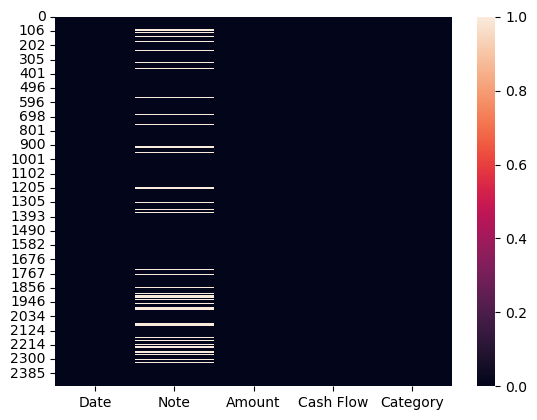

In [73]:
sns.heatmap(df.isna())

<Axes: >

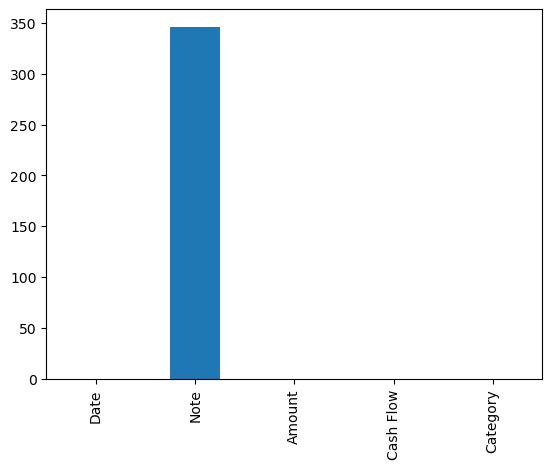

In [74]:
df.isna().sum().plot(kind='bar')

In [75]:
df.dropna(inplace=True)

In [76]:
df.shape

(1830, 5)

<Axes: >

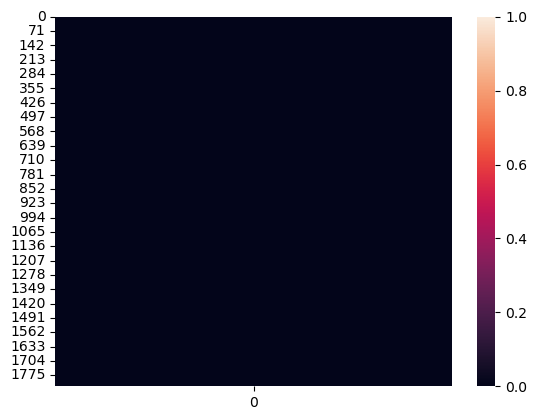

In [77]:
sns.heatmap(np.expand_dims(df.duplicated(), axis=1))

<Axes: xlabel='Category'>

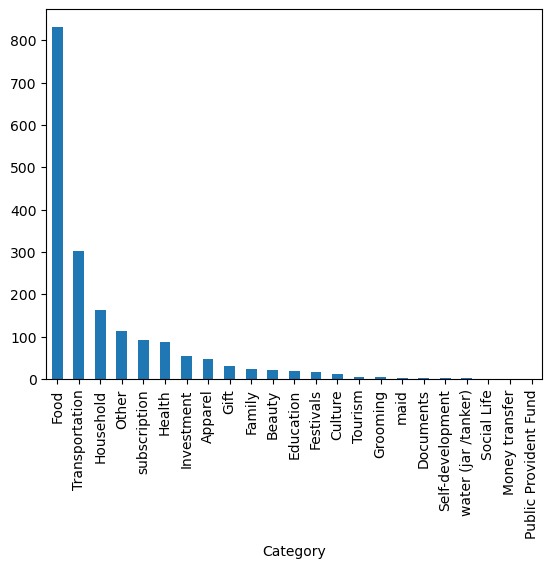

In [78]:
df.Category.value_counts().plot(kind='bar')


In [79]:
category_map = {
    'Food': 'Food & Beverage',

    'Transportation': 'Transport',
    'Tourism': 'Transport',

    'Household': 'Household',
    'maid': 'Household',
    'water (jar /tanker)': 'Household',

    'subscription': 'Subscriptions & Utilities',
    'Saving Bank account 1': 'Subscriptions & Utilities',
    'Documents': 'Subscriptions & Utilities',

    'Health': 'Health & Grooming',
    'Beauty': 'Health & Grooming',
    'Grooming': 'Health & Grooming',

    'Apparel': 'Shopping & Lifestyle',
    'Culture': 'Shopping & Lifestyle',
    'Social Life': 'Shopping & Lifestyle',
    'Self-development': 'Shopping & Lifestyle',

    'Gift': 'Family & Gifts',
    'Family': 'Family & Gifts',
    'Festivals': 'Family & Gifts',

    'Education': 'Education',

    'Salary': 'Income',
    'Bonus': 'Income',
    'Maturity amount': 'Income',
    'Interest': 'Income',
    'Dividend earned on Shares': 'Income',

    'Investment': 'Investments',
    'Equity Mutual Fund A': 'Investments',
    'Equity Mutual Fund D': 'Investments',
    'Equity Mutual Fund E': 'Investments',
    'Equity Mutual Fund F': 'Investments',
    'Share Market': 'Investments',
    'Fixed Deposit': 'Investments',
    'Recurring Deposit': 'Investments',
    'Public Provident Fund': 'Investments',

    'Money transfer': 'Other',
    'Petty cash': 'Other',

    'Gpay Reward': 'Other',
    'Other': 'Other'
}

In [80]:
df['Category'] = df['Category'].map(category_map)

Text(0.5, 1.0, 'Number of transactions per category')

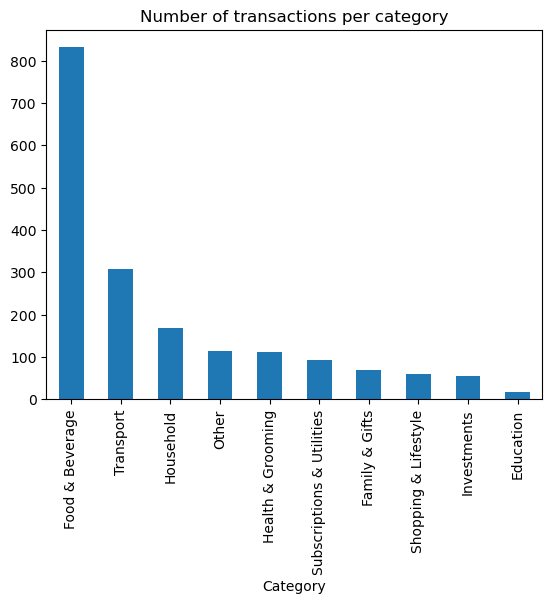

In [81]:
df['Category'] = df['Category'].astype('category')
df.Category.value_counts().plot(kind='bar')
plt.title('Number of transactions per category')

Text(137.64444444444445, 0.5, 'Amount')

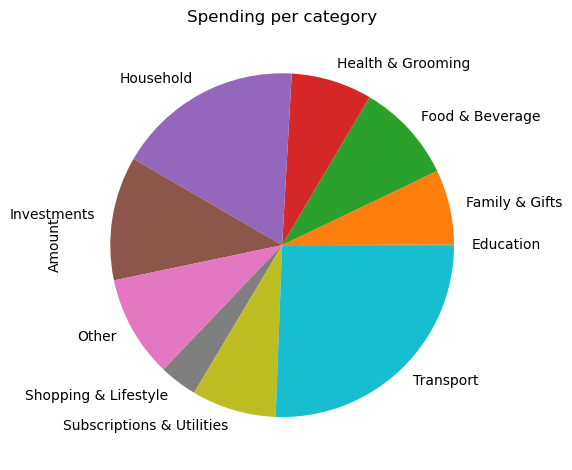

In [82]:

df.groupby('Category')['Amount'].sum().plot(kind='pie')
plt.title('Spending per category')
plt.tight_layout()
plt.ylabel('Amount', fontsize=10)

### Performing Time series analysis

In [83]:
df_time = df.set_index('Date')

In [84]:
pd.to_datetime(df.Date)

0      2018-09-20
1      2018-09-20
2      2018-09-19
3      2018-09-17
4      2018-09-16
          ...    
2456   2015-01-01
2457   2015-01-01
2458   2015-01-01
2459   2015-01-01
2460   2015-01-01
Name: Date, Length: 1830, dtype: datetime64[ns]

Text(0.5, 1.0, 'Total spending per month')

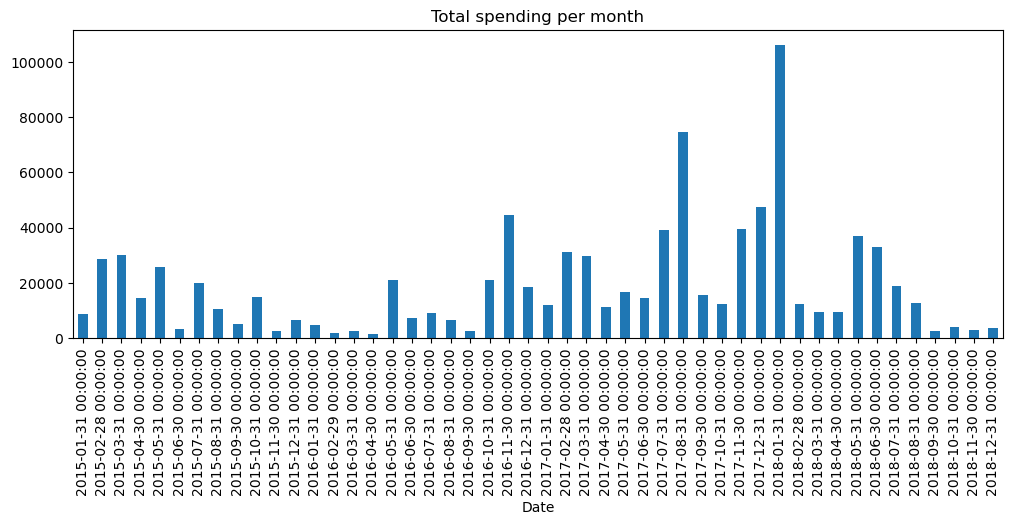

In [85]:
plt.figure(figsize=(12,4))
df_time.resample('M')['Amount'].sum().plot(kind='bar')
plt.title('Total spending per month')

<Figure size 1400x600 with 0 Axes>

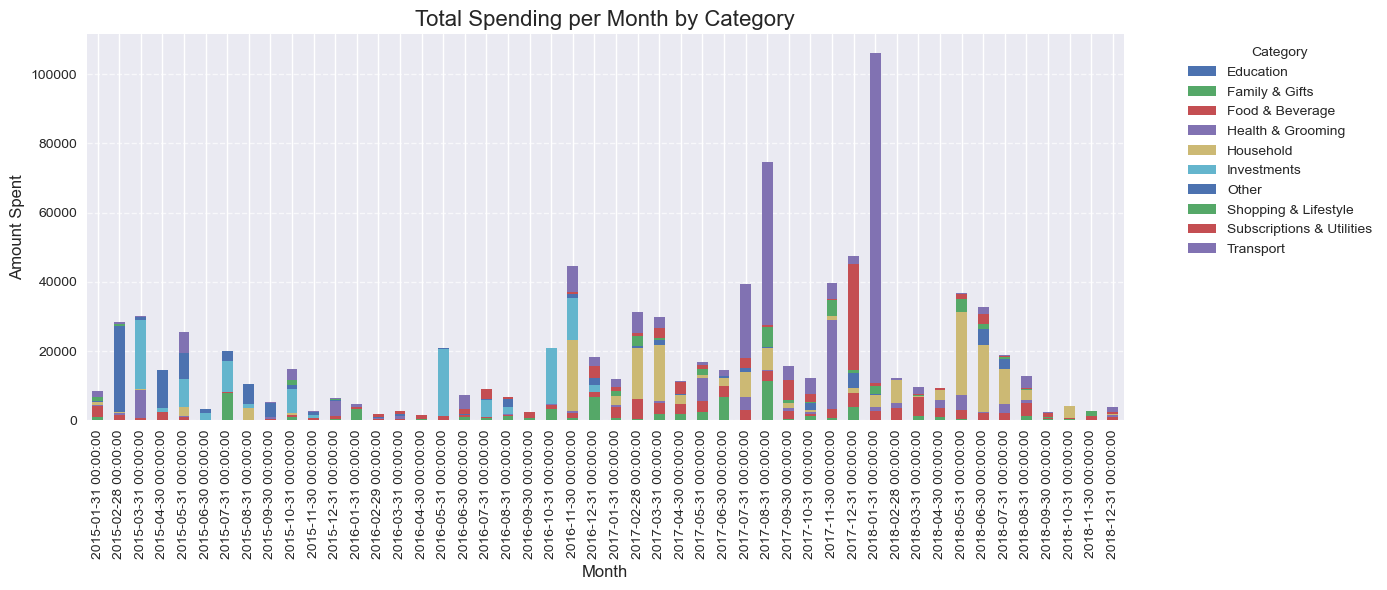

In [86]:
# monthly_category = df_time.groupby([pd.Grouper(freq='M'), 'Category'])['Amount'].sum().unstack().fillna(0)
plt.style.use('seaborn-v0_8')
monthly_category = df_time.groupby([pd.Grouper(freq='M'), 'Category'])['Amount'].sum().reset_index().pivot_table(index='Date', columns='Category', values='Amount', aggfunc='sum')
# Plot stacked bar chart
plt.figure(figsize=(14, 6))
monthly_category.plot(kind='bar', stacked=True, figsize=(14, 6))

plt.title('Total Spending per Month by Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Amount Spent', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

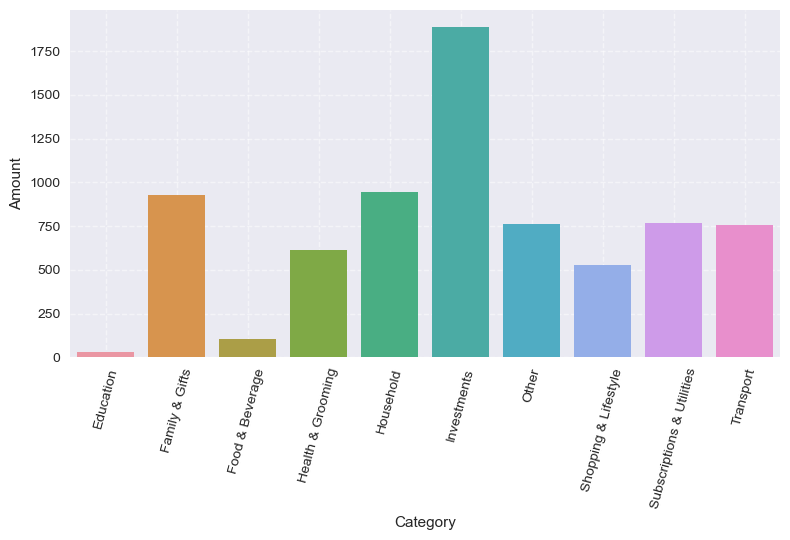

In [87]:
# Average spending per transaction for each category.

sns.barplot(data=df, x='Category', y='Amount', estimator=np.mean, errorbar=None)
plt.xticks(rotation=75)
plt.tight_layout()
plt.grid(True, alpha=0.5, linestyle='--')

In [88]:
df.to_csv('final_data.csv', index=False)

Text(0, 0.5, 'Amount')

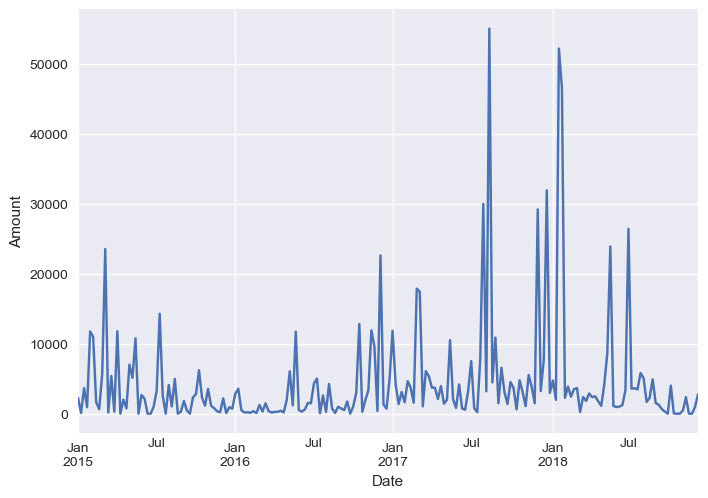

In [ ]:
# Total spending per week 

df_time.resample('W')['Amount'].sum().fillna(0).plot(kind='line')
plt.ylabel('Amount')

Text(0, 0.5, 'Count')

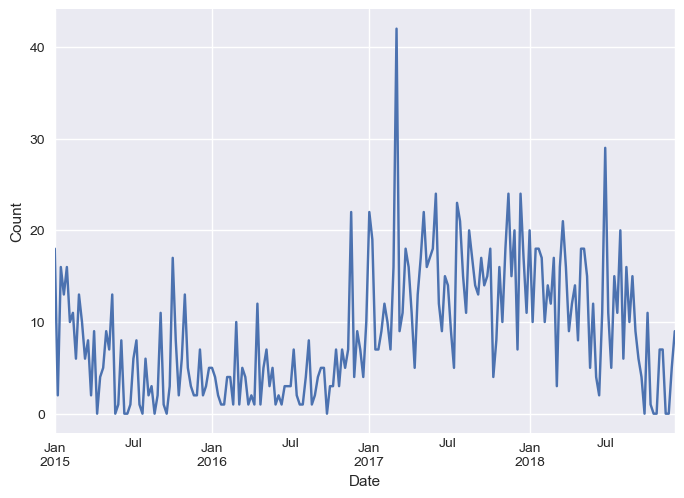

In [97]:
# Number of transaction per week basis

df_time.resample('W')['Amount'].count().fillna(0).plot(kind='line')
plt.ylabel('Count')